# 1. Get comfortable with YOLO

## Model Description

<img width="800" alt="YOLOv5 Model Comparison" src="https://github.com/ultralytics/yolov5/releases/download/v1.0/model_comparison.png">
&nbsp;

[YOLOv5](https://ultralytics.com/yolov5) 🚀 is a family of compound-scaled object detection models trained on the COCO dataset, and includes simple functionality for Test Time Augmentation (TTA), model ensembling, hyperparameter evolution, and export to ONNX, CoreML and TFLite.

|Model |size<br><sup>(pixels) |mAP<sup>val<br>0.5:0.95 |mAP<sup>test<br>0.5:0.95 |mAP<sup>val<br>0.5 |Speed<br><sup>V100 (ms) | |params<br><sup>(M) |FLOPS<br><sup>640 (B)
|---   |---  |---        |---         |---             |---                |---|---              |---
|[YOLOv5s6](https://github.com/ultralytics/yolov5/releases)   |1280 |43.3     |43.3     |61.9     |**4.3** | |12.7  |17.4
|[YOLOv5m6](https://github.com/ultralytics/yolov5/releases)   |1280 |50.5     |50.5     |68.7     |8.4     | |35.9  |52.4
|[YOLOv5l6](https://github.com/ultralytics/yolov5/releases)   |1280 |53.4     |53.4     |71.1     |12.3    | |77.2  |117.7
|[YOLOv5x6](https://github.com/ultralytics/yolov5/releases)   |1280 |**54.4** |**54.4** |**72.0** |22.4    | |141.8 |222.9
|[YOLOv5x6](https://github.com/ultralytics/yolov5/releases) TTA |1280 |**55.0** |**55.0** |**72.0** |70.8 | |-  |-

<details>
  <summary>Table Notes (click to expand)</summary>

  * AP<sup>test</sup> denotes COCO [test-dev2017](http://cocodataset.org/#upload) server results, all other AP results denote val2017 accuracy.
  * AP values are for single-model single-scale unless otherwise noted. **Reproduce mAP** by `python test.py --data coco.yaml --img 640 --conf 0.001 --iou 0.65`
  * Speed<sub>GPU</sub> averaged over 5000 COCO val2017 images using a GCP [n1-standard-16](https://cloud.google.com/compute/docs/machine-types#n1_standard_machine_types) V100 instance, and includes FP16 inference, postprocessing and NMS. **Reproduce speed** by `python test.py --data coco.yaml --img 640 --conf 0.25 --iou 0.45`
  * All checkpoints are trained to 300 epochs with default settings and hyperparameters (no autoaugmentation).
  * Test Time Augmentation ([TTA](https://github.com/ultralytics/yolov5/issues/303)) includes reflection and scale augmentation. **Reproduce TTA** by `python test.py --data coco.yaml --img 1536 --iou 0.7 --augment`

</details>

<p align="left"><img width="800" src="https://github.com/ultralytics/yolov5/releases/download/v1.0/model_plot.png"></p>

<details>
  <summary>Figure Notes (click to expand)</summary>

  * GPU Speed measures end-to-end time per image averaged over 5000 COCO val2017 images using a V100 GPU with batch size 32, and includes image preprocessing, PyTorch FP16 inference, postprocessing and NMS.
  * EfficientDet data from [google/automl](https://github.com/google/automl) at batch size 8.
  * **Reproduce** by `python test.py --task study --data coco.yaml --iou 0.7 --weights yolov5s6.pt yolov5m6.pt yolov5l6.pt yolov5x6.pt`

</details>

1.1 Switch to GPU first

1.2 Install the required packages/dependencies

In [ ]:
!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt  # install dependencies
# in colab if you run command lines, you need this exclamation mark "!".

     |████████████████████████████████| 596 kB 4.3 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


1.3 load model and test some images

In [ ]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-4-4 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)



  0%|          | 0.00/14.1M [00:00<?, ?B/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [ ]:
# Images
imgs = ['https://ultralytics.com/images/zidane.jpg']  # batch of images
img2 = ['https://drive.google.com/uc?export=view&id=1bkhzXSvONU8NhmdlQW9iyqf68ihu2LSn']
img3 = ['/content/drive/...'] # google drive

# Inference
#results = model(imgs)
results = model(img2)

In [ ]:
# Results
results.print()
results.save()  # or .show()

image 1/1: 1356x2048 24 persons, 1 traffic light, 5 handbags
Speed: 997.9ms pre-process, 12.7ms inference, 1.7ms NMS per image at shape (1, 3, 448, 640)
Saved 1 image to runs/detect/exp5


In [ ]:
results.xyxy[0]  # img1 predictions (tensor)

In [ ]:
results.pandas().xyxy[0]  # img1 predictions (pandas)
#      xmin    ymin    xmax   ymax  confidence  class    name
# 0  749.50   43.50  1148.0  704.5    0.874023      0  person
# 1  433.50  433.50   517.5  714.5    0.687988     27     tie
# 2  114.75  195.75  1095.0  708.0    0.624512      0  person
# 3  986.00  304.00  1028.0  420.0    0.286865     27     tie

# confidence is like softmax, like probability

,xmin,ymin,xmax,ymax,confidence,class,name
0,295.739319,986.727478,550.571045,1349.673706,0.869891,0,person
1,879.397156,971.772644,1001.129578,1351.176147,0.803481,0,person
2,1311.372437,948.359985,1534.890869,1356.000000,0.778500,0,person
3,0.170007,124.797180,240.145370,529.090454,0.777286,0,person
4,1075.585327,916.649414,1148.604248,1165.391602,0.713538,0,person
5,1920.743774,933.114441,2016.517944,1177.676025,0.709238,0,person
6,296.916656,0.000000,642.065491,607.425720,0.708325,0,person
7,970.659363,901.733521,1042.625854,1121.980835,0.697552,0,person
8,1761.123291,931.255981,1868.127930,1231.273560,0.689722,0,person
9,829.773254,916.997498,891.662109,1120.182617,0.638615,0,person


# 2. Train Your Own Data

2.1 Obtain the package from Github, as we will follow the author's setting to place the data.

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12445, done.
remote: Total 12445 (delta 0), reused 0 (delta 0), pack-reused 12445
Receiving objects: 100% (12445/12445), 11.59 MiB | 12.38 MiB/s, done.
Resolving deltas: 100% (8666/8666), done.


2.2 Unzip data from Google drive and fomulate the directory according to the YOLO instructions

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/HKU-MUA/CourseData/RoadSignYOLOData.zip" -d "/content/yolov5/data/"

# !rm -rf "/content/__MACOSX"
# watch out. Don't delete drive, which is google drive

2.3 Setup yaml files

**the easiest way is right click and create new file and paste the following**

```markdown
train: /content/yolov5/data/images/train/ 
val:  /content/yolov5/data/images/val/
test: /content/yolov5/data/images/test/

# number of classes
nc: 4

# class names
names: ["trafficlight","stop", "speedlimit","crosswalk"]
```





2.4 Setup hyperparameters (in the hyps folder)

we may simply use hyp.scratch-med.yaml for demonstration purpose

2.4 Setup the network structure (if needed)

the setup files for models is under "models" directory. We may simpliy use yolo5m.yaml. 

2.5 Train the model

In [ ]:
%cd /content/yolov5
# change directory in colab is not !cd. Just remember will be fine.

/content/yolov5


In [ ]:
!python train.py --img 640 --cfg yolov5s.yaml --hyp hyp.scratch-med.yaml --batch 32 --epochs 100 --data roadSign.yaml --weights yolov5s.pt --workers 24 --name yolo_road_det
# switch to 3 epoch for quick demonstration during the lecture

2.6 Visualize the results

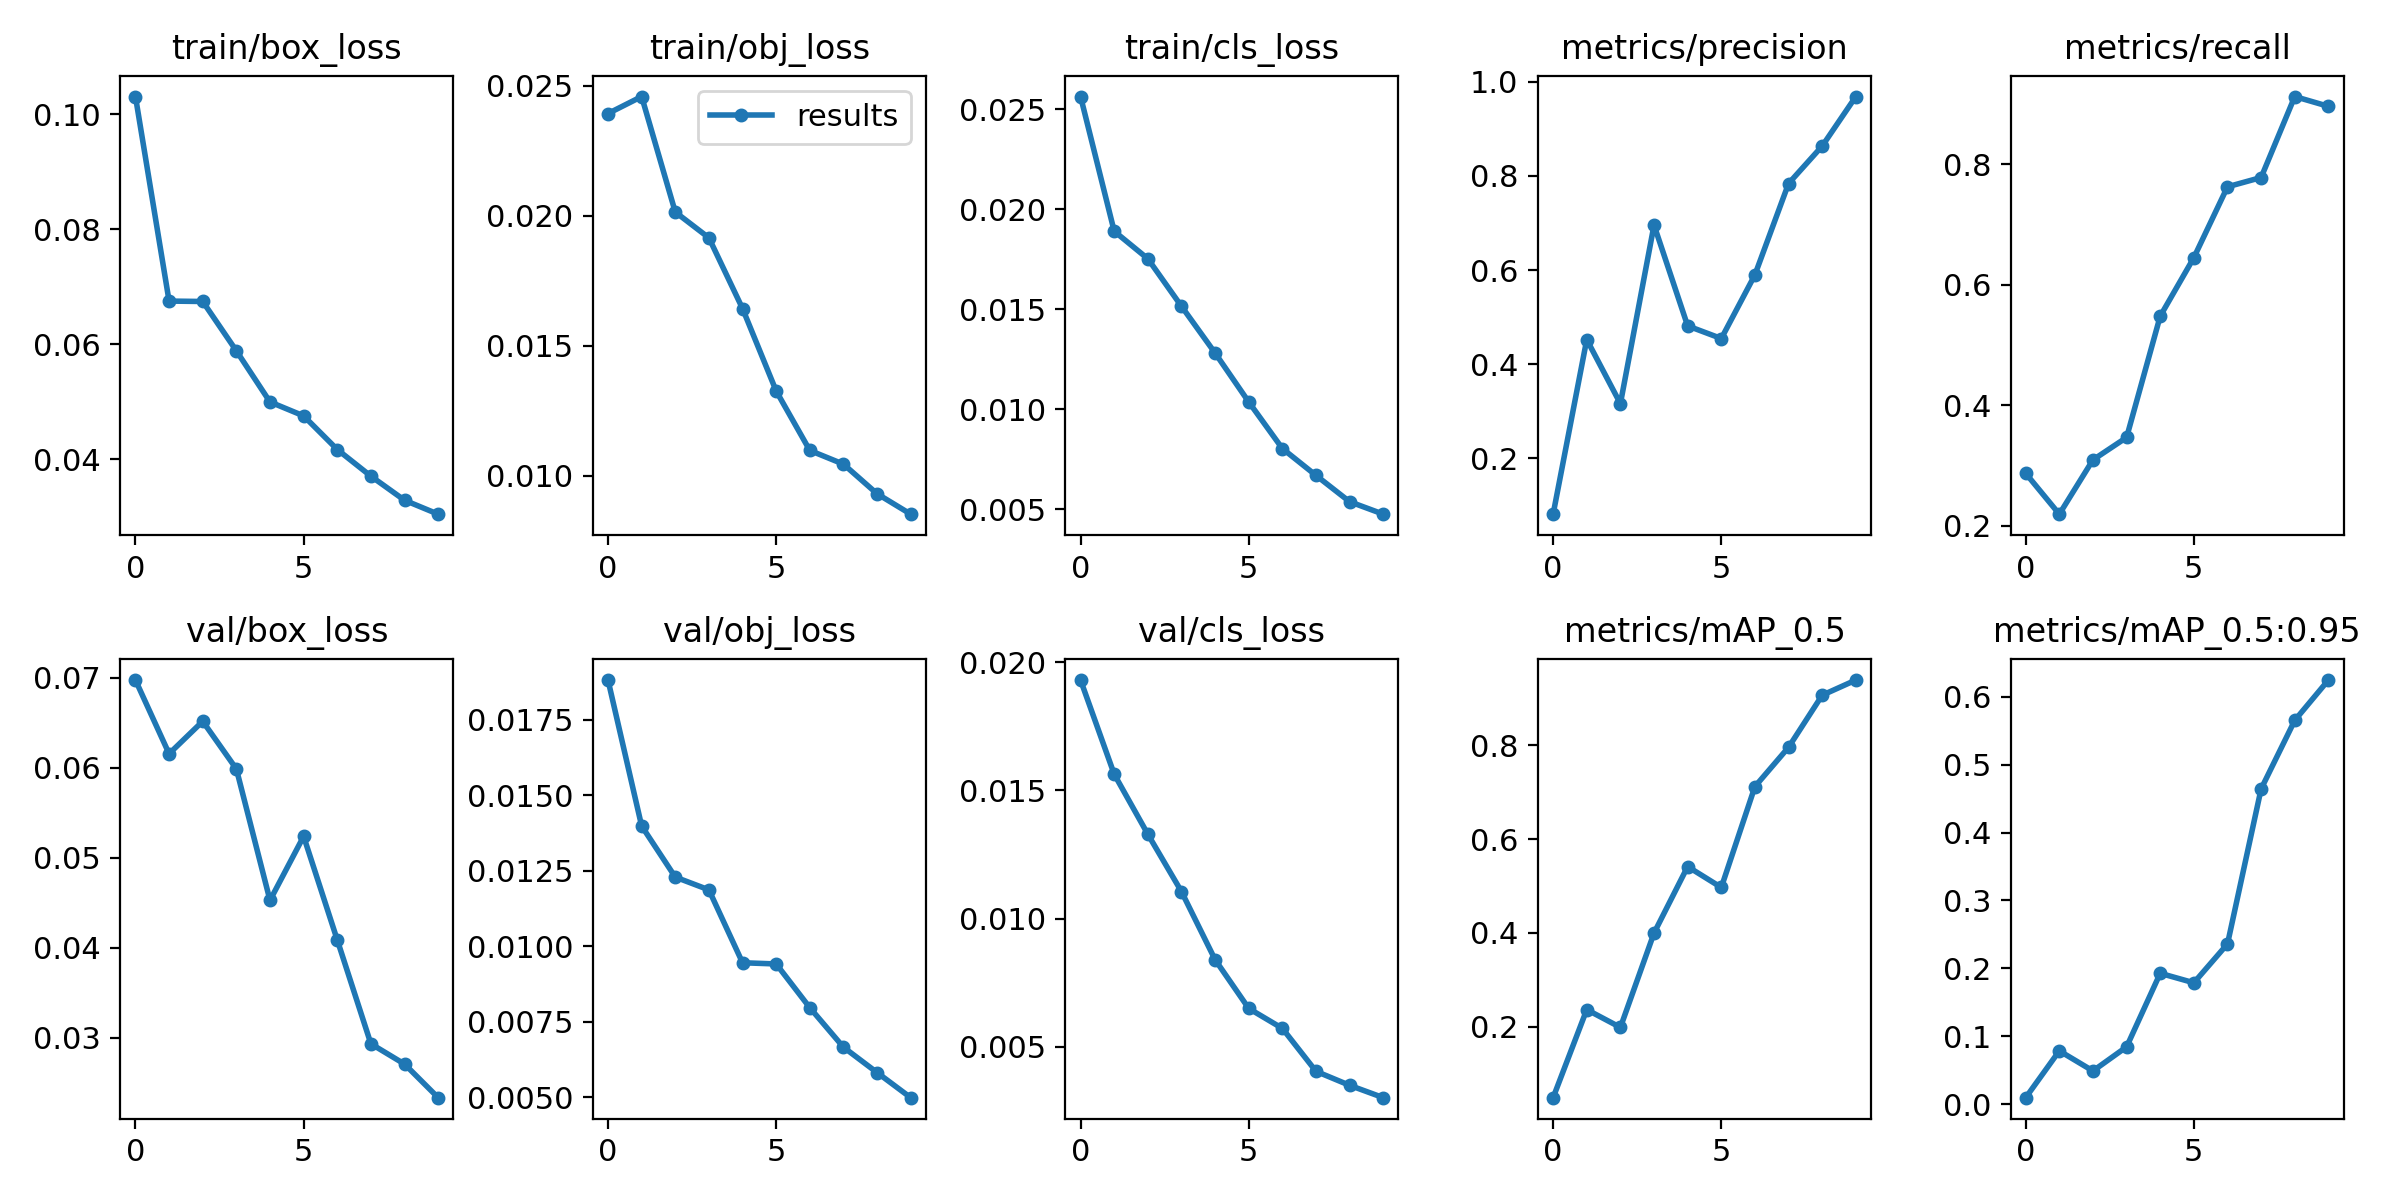

In [ ]:
from IPython.display import display, Image
PATH = '/content/yolov5/runs/train/yolo_road_det/results.png'
display(Image(filename=PATH))

* obj loss is the combined loss
* cls loss is the class loss (image recognition)
* box loss is the bounding box losses (xywh)

2.7 Test and Inference

In [ ]:
!python detect.py --source data/images/val/ --weights runs/train/yolo_road_det/weights/best.pt --conf 0.25 --name yolo_road_det
# the results can be found at runs/detect/yolo_road_det

# 3. Detect Video

In [ ]:
!python detect.py --source /content/drive/MyDrive/HKU-MUA/CourseData/urbanScene.mp4 --weights /content/drive/MyDrive/HKU-MUA/CourseData/X-512.pt --conf 0.25 --name urban_scene
# the results can be found at runs/...

# 4* Image Annotation

For a quick in-class demonstration: 

https://www.makesense.ai/



Others:

https://towardsdatascience.com/image-data-labelling-and-annotation-everything-you-need-to-know-86ede6c684b1